In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/DS assigment/Naive Bayes and Text Mining/blogs.csv")
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [ ]:
df.columns

Index(['Data', 'Labels'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [ ]:
df.describe()

,Data,Labels
count,2000,2000
unique,2000,20
top,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,alt.atheism
freq,1,100


In [ ]:
df.shape

(2000, 2)

In [ ]:
df.nunique()

,0
Data,2000
Labels,20


In [ ]:
for i in df.columns:
  print(i)
  print(df[i].value_counts(),"\n")

Data
Data
Xref: cantaloupe.srv.cs.cmu.edu talk.religion.misc:84293 alt.religion.kibology:8356 alt.spam:30\nNewsgroups: talk.religion.misc,alt.religion.kibology,alt.spam\nPath: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!darwin.sura.net!sgiblab!cs.uoregon.edu!news.uoregon.edu!netnews.nwnet.net!news.u.washington.edu!ns1.nodak.edu!plains.NoDak.edu!cayley\nFrom: cayley@plains.NoDak.edu (Michele Cayley)\nSubject: Re: New Religion Forming -- Sign Up\nSender: usenet@ns1.nodak.edu (Usenet login)\nMessage-ID: <C62pCF.LFx@ns1.nodak.edu>\nDate: Mon, 26 Apr 1993 04:19:27 GMT\nReferences: <-g25zll@rpi.edu> <1993Apr26.004116.10087@monu6.cc.monash.edu.au>\nNntp-Posting-Host: plains.nodak.edu\nOrganization: North Dakota Higher Education Computing Network\nLines: 10\n\n\nrefrettably you are mistaken.  alt.drugs was used to recruit people for the\nworldwide pot religion.  I, however hve no problem being in both of them\n\n\n\nDeath to Dupont\nFree Bobby Fischer\nMi

In [ ]:
!pip install nltk==3.8.1

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    return tokens

In [ ]:
df['preprocessed_text'] = df['Data'].apply(preprocess_text)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

# Convert labels to numerical form using LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(df['Labels'])  # 'Labels' is your target variable column


df['joined_text'] = df['preprocessed_text'].apply(' '.join)

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Fit and transform the 'joined_text' column
tfidf_matrix = vectorizer.fit_transform(df['joined_text'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['Labels'], test_size=0.2, random_state=42)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Create a Multinomial Naive Bayes classifier
classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Train the classifier (already done in the previous step)
# classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)
y_pred

array(['talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'sci.med',
       'rec.sport.baseball', 'sci.electronics', 'sci.electronics',
       'rec.sport.baseball', 'talk.politics.mideast', 'alt.atheism',
       'sci.med', 'alt.atheism', 'sci.electronics', 'sci.crypt',
       'rec.sport.baseball', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.autos', 'comp.graphics',
       'talk.politics.guns', 'talk.politics.misc',
       'comp.sys.mac.hardware', 'alt.atheism', 'alt.atheism',
       'rec.sport.hockey', 'alt.atheism', 'sci.crypt',
       'talk.politics.misc', 'rec.sport.baseball', 'rec.autos',
       'alt.atheism', 'talk.politics.misc', 'rec.sport.hockey',
       'comp.windows.x', 'rec.sport.hockey', 'rec.sport.hockey',
       'comp.sys.mac.hardware', 'sci.med', 'sci.electronics',
       'rec.sport.hockey', 'comp.os.ms-windows.misc', 'sci.electronics',
       'soc.religion.christian', 'comp.os.ms-windows.misc',
       'talk.politics.misc', 'soc.religion.christian',

In [ ]:
!pip install textblob==0.17.1

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a value between -1 and 1

In [ ]:
df['sentiment'] = df['Data'].apply(get_sentiment)

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
  analysis = TextBlob(text)
  # Classify sentiment based on polarity score
  if analysis.sentiment.polarity > 0:
    return 'positive'
  elif analysis.sentiment.polarity < 0:
    return 'negative'
  else:
    return 'neutral'

df['sentiment'] = df['Data'].apply(get_sentiment)

In [24]:
sentiment_distribution = df.groupby(['Labels', 'sentiment'])['sentiment'].count().unstack()
sentiment_distribution

sentiment,negative,positive
Labels,,
alt.atheism,23,77
comp.graphics,24,76
comp.os.ms-windows.misc,22,78
comp.sys.ibm.pc.hardware,20,80
comp.sys.mac.hardware,24,76
comp.windows.x,27,73
misc.forsale,16,84
rec.autos,17,83
rec.motorcycles,26,74


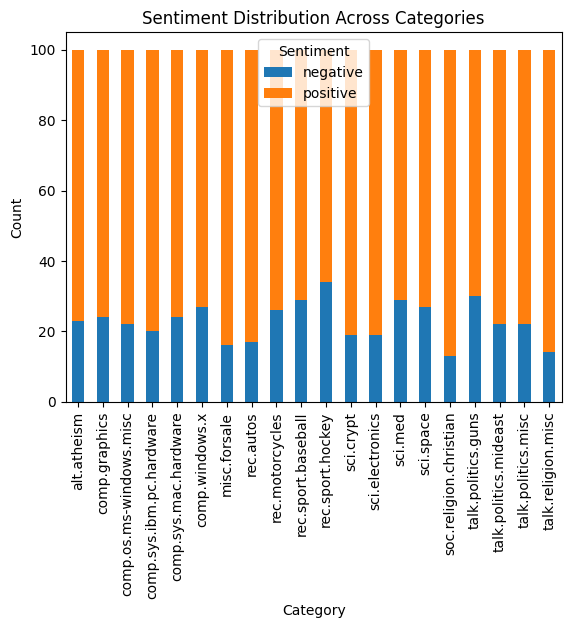

In [ ]:
import matplotlib.pyplot as plt

sentiment_distribution.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Sentiment')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class classification
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class classification
print("Recall:", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class classification
print("F1-score:", f1)

Accuracy: 0.8225
Precision: 0.8511951331336539
Recall: 0.8225
F1-score: 0.8148158756580917
